In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np 
import datetime

In [2]:
# To read the data from csv and load it into data frame
df = pd.read_csv ('C:\\Users\\shubh\\Desktop\\UCD\\Project\\Data Set\\bestsellers_with_categories_2022_03_27.csv')
print(df)

                                                  Name                 Author  \
0    Act Like a Lady, Think Like a Man: What Men Re...           Steve Harvey   
1    Arguing with Idiots: How to Stop Small Minds a...             Glenn Beck   
2            Breaking Dawn (The Twilight Saga, Book 4)        Stephenie Meyer   
3          Crazy Love: Overwhelmed by a Relentless God           Francis Chan   
4    Dead And Gone: A Sookie Stackhouse Novel (Sook...       Charlaine Harris   
..                                                 ...                    ...   
695                   The Wonderful Things You Will Be  Emily Winfield Martin   
696                                 Ugly Love: A Novel         Colleen Hoover   
697                                             Verity         Colleen Hoover   
698               What to Expect When You're Expecting          Heidi Murkoff   
699                            Where the Crawdads Sing            Delia Owens   

     User Rating  Reviews  

In [3]:
# Fill null values(NaN) with blank
df = df.fillna(0)
print(df)

                                                  Name                 Author  \
0    Act Like a Lady, Think Like a Man: What Men Re...           Steve Harvey   
1    Arguing with Idiots: How to Stop Small Minds a...             Glenn Beck   
2            Breaking Dawn (The Twilight Saga, Book 4)        Stephenie Meyer   
3          Crazy Love: Overwhelmed by a Relentless God           Francis Chan   
4    Dead And Gone: A Sookie Stackhouse Novel (Sook...       Charlaine Harris   
..                                                 ...                    ...   
695                   The Wonderful Things You Will Be  Emily Winfield Martin   
696                                 Ugly Love: A Novel         Colleen Hoover   
697                                             Verity         Colleen Hoover   
698               What to Expect When You're Expecting          Heidi Murkoff   
699                            Where the Crawdads Sing            Delia Owens   

     User Rating  Reviews  

In [4]:
# Counter for total count of Fictional and Non-Fictional records/books
counter_fict = 0
counter_nonfict = 0

for idx,row in df.iterrows():
    #print(row['Genre'])
    if row['Genre'] == 'Fiction':
        counter_fict = counter_fict + 1
    elif row['Genre'] == 'Non Fiction' :
        counter_nonfict = counter_nonfict + 1
    else:
        continue
print('Fiction :',counter_fict)
print('Non Fiction :',counter_nonfict)


Fiction : 312
Non Fiction : 388


In [5]:
#Converting the counters into a list to generate a graph
#Create Empty List
list_genre = []
#Append values to empty list
list_genre.append(counter_fict)
list_genre.append(counter_nonfict)
print('List Values : ',list_genre)

List Values :  [312, 388]


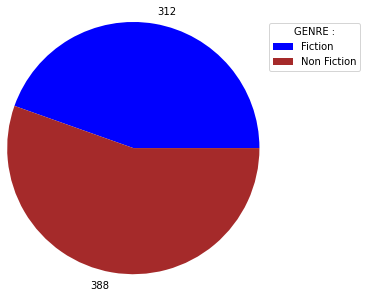

In [6]:
#Generate Pie chart
mylabels = ["Fiction", "Non Fiction"]
mycolors = ["blue", "brown"]

plt.pie(list_genre,labels = list_genre, colors = mycolors,  radius = 1.45)
plt.legend(title = "GENRE :", labels = mylabels, bbox_to_anchor=(1.1, 1.1))
plt.show()

In [7]:
#Generate multiple bar graph by preparing values yearwise
df_multiplebarchart = df.groupby(['Year','Genre']).sum()
#print(df_multiplebarchart)

#Unique List
Years = df['Year'].unique()

#Counters set to 0
fict_price = 0
non_fict_price = 0

#Empty list 
X_val = []
Fict_Price_val = []
Non_Fict_price_val = []

#Loop to sum price of Genres for a specific years from Unique Year List
for x in Years:
    fict_price = 0
    non_fict_price = 0
    #print('Year : ',x)
    for idx,row in df.iterrows():      
        if row['Genre'] == 'Fiction' and row['Year'] == x:
            fict_price = fict_price + row['Price']
        elif row['Genre'] == 'Non Fiction' and row['Year'] == x:
            non_fict_price = non_fict_price + row['Price']
        else:
            continue
    #print('Fiction Price :',fict_price)
    #print('Non Fiction Price :',non_fict_price)

    #Append the lists with sum of price
    X_val.append(x)
    Fict_Price_val.append(fict_price)
    Non_Fict_price_val.append(non_fict_price)

print(X_val)
print(Fict_Price_val)
print(Non_Fict_price_val)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
[374, 194, 244, 258, 257, 295, 159, 240, 212, 184, 187, 190, 229, 304]
[396, 480, 511, 507, 473, 437, 362, 419, 357, 342, 317, 333, 310, 319]


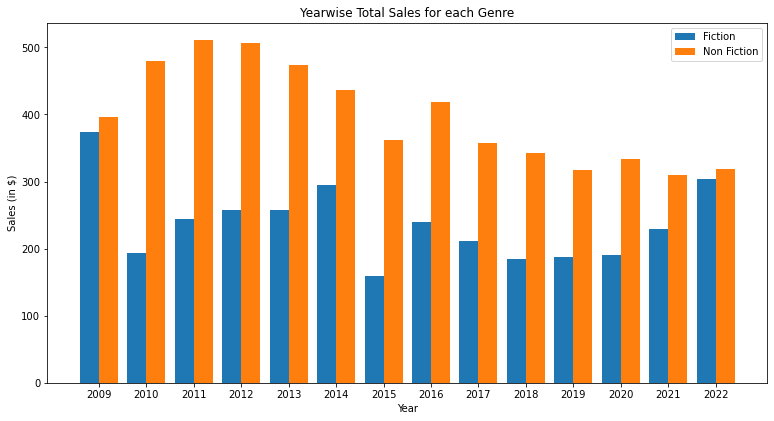

In [8]:
#Generate Multiple bar graph to represent Yearly Sales 
fig = plt.figure(figsize=(10, 5))
X_axis = np.arange(len(X_val))
ax = fig.add_axes([0,0,1,1])  
ax.bar(X_axis - 0.2, Fict_Price_val, 0.4, label = 'Fiction')
ax.bar(X_axis + 0.2, Non_Fict_price_val, 0.4, label = 'Non Fiction')
  
plt.xticks(X_axis, X_val)
plt.xlabel("Year")
plt.ylabel("Sales (in $)")
plt.title("Yearwise Total Sales for each Genre")
plt.legend()
plt.show()

In [9]:
#Calculating Positive and Negative Reviews which is not present in the dataset
pos_r = []
neg_r = []

cnt = 0

for idx,row in df.iterrows():
    pos_r1 = 0
    neg_r1 = 0
    pos_r1 = math.ceil((row['User Rating']/5) * row['Reviews'])
    neg_r1 = row['Reviews'] - pos_r1
    #Rounding up values to consider integers
    pos_r1 = math.ceil(pos_r1)
    neg_r1 = math.ceil(neg_r1)
    
    #Converting count of negative reviews into positive integers so as to use it in the graph
    if neg_r1 < 0 :
        neg_r1 = neg_r1 * (-1)
    pos_r.insert(cnt, pos_r1)
    neg_r.insert(cnt, neg_r1)
    cnt = cnt + 1

print(pos_r)
print(neg_r)

[4612, 735, 8988, 1450, 1418, 3684, 35, 3054, 648, 823, 5175, 5175, 1256, 1506, 3112, 1853, 1215, 3675, 2809, 5226, 3796, 9592, 7722, 915, 4056, 1425, 1613, 8579, 807, 1488, 2951, 739, 6816, 9292, 8072, 13317, 3787, 4443, 7348, 1589, 18143, 3308, 3083, 3573, 2855, 395, 10976, 5797, 3676, 9569, 424, 413, 579, 424, 21258, 1450, 4477, 1655, 1967, 1519, 2273, 1369, 1070, 368, 3112, 2477, 1203, 24067, 9592, 527, 7722, 1866, 3330, 1190, 4056, 1755, 561, 3269, 11105, 3324, 3030, 388, 2951, 7283, 6816, 9292, 13317, 30195, 8732, 4443, 4326, 1057, 2012, 1108, 1953, 3645, 2855, 2191, 28487, 1094, 1888, 11126, 3818, 4325, 21258, 1450, 4477, 1759, 5712, 5147, 9186, 3112, 14833, 4023, 4876, 19185, 8782, 1386, 24067, 2910, 7722, 1866, 7201, 4056, 561, 1991, 3945, 3269, 8579, 11105, 4356, 1659, 2951, 7283, 13317, 13317, 30195, 16272, 8732, 3738, 5476, 1057, 3233, 4119, 1376, 10152, 5141, 28487, 8063, 2941, 1245, 21258, 5712, 20796, 18236, 35922, 12568, 5147, 45817, 3112, 6898, 14833, 19185, 7944, 8782

In [10]:
#Adding columns to and existing dataframe
df['Positive_Reviews'] = pos_r
df['Negative_Reviews'] = neg_r

In [11]:
# Added 2 columns for Review (positive and Negative) at the end of the dataframe and displaying selected columns only
print(df[['Author','User Rating','Reviews','Positive_Reviews','Negative_Reviews']])

                    Author  User Rating  Reviews  Positive_Reviews  \
0             Steve Harvey          4.6     5013              4612   
1               Glenn Beck          4.6      798               735   
2          Stephenie Meyer          4.6     9769              8988   
3             Francis Chan          4.7     1542              1450   
4         Charlaine Harris          4.6     1541              1418   
..                     ...          ...      ...               ...   
695  Emily Winfield Martin          4.9    20920             20502   
696         Colleen Hoover          4.7    33929             31894   
697         Colleen Hoover          4.6    71826             66080   
698          Heidi Murkoff          4.8    27052             25970   
699            Delia Owens          4.8   208917            200561   

     Negative_Reviews  
0                 401  
1                  63  
2                 781  
3                  92  
4                 123  
..             

In [12]:
#Filtering df based on random Author names
df_1 = df[df['Author'] == 'E L James'] 
df_2 = df[df['Author'] == 'J.K. Rowling'] 
df_3 = df[df['Author'] == 'Jim Collins'] 
df_4 = df[df['Author'] == 'Stephenie Meyer'] 
df_5 = df[df['Author'] == 'George R.R. Martin'] 

#Merging above dataframes into one
frames = [df_1, df_2, df_3, df_4, df_5]
author_df = pd.concat(frames)
print(author_df)

                                                  Name              Author  \
153                                Fifty Shades Darker           E L James   
154  Fifty Shades Freed: Book Three of the Fifty Sh...           E L James   
155  Fifty Shades of Grey: Book One of the Fifty Sh...           E L James   
156  Fifty Shades Trilogy (Fifty Shades of Grey / F...           E L James   
208  Fifty Shades of Grey: Book One of the Fifty Sh...           E L James   
317  Grey: Fifty Shades of Grey as Told by Christia...           E L James   
178                                 The Casual Vacancy        J.K. Rowling   
361  Fantastic Beasts and Where to Find Them: The O...        J.K. Rowling   
365  Harry Potter and the Chamber of Secrets: The I...        J.K. Rowling   
366  Harry Potter and the Cursed Child, Parts 1 & 2...        J.K. Rowling   
367  Harry Potter and the Sorcerer's Stone: The Ill...        J.K. Rowling   
368         Harry Potter Paperback Box Set (Books 1-7)        J.

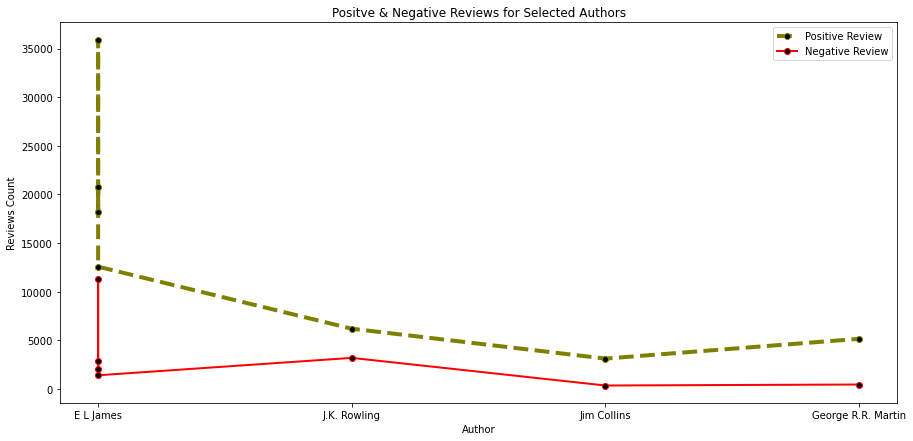

In [13]:
#Filtered to take 2012 records
author_df1 = author_df[author_df['Year'] == 2012]

# Generate multiple line plots
x = author_df1['Author'].tolist()
y = author_df1['Reviews'].tolist()
z = author_df1['Positive_Reviews'].tolist()
v = author_df1['Negative_Reviews'].tolist()

fig = plt.figure(figsize=(15, 7))
plt.plot( x, z, color='olive', marker='.', markerfacecolor='black', linestyle="--", markersize=12, linewidth=4)
plt.plot( x, v, color='red', marker='.', markerfacecolor='black', linestyle="-", markersize=12, linewidth=2)

plt.xlabel("Author")
plt.ylabel("Reviews Count")
plt.title("Positve & Negative Reviews for Selected Authors")

# show legend
plt.legend(["Positive Review", "Negative Review"])

# show graph
plt.show()

#print(author_df1)

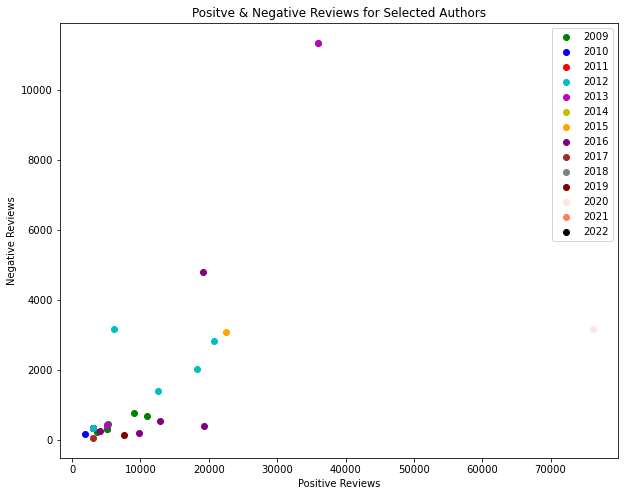

In [14]:
#Generate scatter plot yearwise for Reviews

author_df1 = author_df[author_df['Year'] == 2009]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
fig = plt.figure(figsize=(10, 8))
plt.scatter(x, y, color = 'g')

author_df1 = author_df[author_df['Year'] == 2010]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'b')

author_df1 = author_df[author_df['Year'] == 2011]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'r')

author_df1 = author_df[author_df['Year'] == 2012]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'c')

author_df1 = author_df[author_df['Year'] == 2013]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'm')

author_df1 = author_df[author_df['Year'] == 2014]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'y')

author_df1 = author_df[author_df['Year'] == 2015]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'orange')

author_df1 = author_df[author_df['Year'] == 2016]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'purple')

author_df1 = author_df[author_df['Year'] == 2017]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'brown')

author_df1 = author_df[author_df['Year'] == 2018]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'grey')

author_df1 = author_df[author_df['Year'] == 2019]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'maroon')

author_df1 = author_df[author_df['Year'] == 2020]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'mistyrose')

author_df1 = author_df[author_df['Year'] == 2021]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'coral')

author_df1 = author_df[author_df['Year'] == 2022]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'k')


plt.xlabel("Positive Reviews")
plt.ylabel("Negative Reviews")
plt.title("Positve & Negative Reviews for Selected Authors")

# produce a legend with the unique colors from the scatter
plt.legend(["2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"],loc='upper right')

